### **Unemployment Analysis with Python**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading the datasets

In [2]:
# Load the datasets
unemployment_india = pd.read_csv('Unemployment_in_India.csv')
unemployment_rate = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')


# Displaying the first few rows of each dataset to understand their structure
unemployment_india.head()
unemployment_rate.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
unemployment_india.info()
unemployment_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [4]:

unemployment_rate.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [5]:
unemployment_india.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Some columns datasets have leading spaces in their names which need to be corrected by stripping the spaces

# Data Cleaning and Preprocessing

In [6]:
# Trimming leading spaces in the affected column values
unemployment_india['Date'] = unemployment_india[' Date'].str.strip()
unemployment_rate['Date'] = unemployment_rate[' Date'].str.strip()

In [7]:
# Check for missing values and duplicates
missing_values_india = unemployment_india.isnull().sum()
missing_values_rate = unemployment_rate.isnull().sum()
duplicates_india = unemployment_india.duplicated().sum()
duplicates_rate = unemployment_rate.duplicated().sum()

missing_values_india, missing_values_rate, duplicates_india, duplicates_rate


(Region                                      28
  Date                                       28
  Frequency                                  28
  Estimated Unemployment Rate (%)            28
  Estimated Employed                         28
  Estimated Labour Participation Rate (%)    28
 Area                                        28
 Date                                        28
 dtype: int64,
 Region                                      0
  Date                                       0
  Frequency                                  0
  Estimated Unemployment Rate (%)            0
  Estimated Employed                         0
  Estimated Labour Participation Rate (%)    0
 Region.1                                    0
 longitude                                   0
 latitude                                    0
 Date                                        0
 dtype: int64,
 27,
 0)

Handling missing values and duplicates in Unemployment_in_India.csv

In [8]:
# Handling missing values and duplicates in Unemployment_in_India.csv
cleaned_unemployment_india = unemployment_india.dropna().drop_duplicates()

# Checking for missing values and duplicates
missing_values_cleaned_india = cleaned_unemployment_india.isnull().sum()
duplicates_cleaned_india = cleaned_unemployment_india.duplicated().sum()

missing_values_cleaned_india, duplicates_cleaned_india, cleaned_unemployment_india.shape

(Region                                      0
  Date                                       0
  Frequency                                  0
  Estimated Unemployment Rate (%)            0
  Estimated Employed                         0
  Estimated Labour Participation Rate (%)    0
 Area                                        0
 Date                                        0
 dtype: int64,
 0,
 (740, 8))

In [9]:
unemployment_india.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-05-2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,30-06-2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,31-07-2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,31-08-2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,30-09-2019


In [10]:
unemployment_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Date
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,31-01-2020
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,29-02-2020
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,31-03-2020
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,30-04-2020
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,31-05-2020


## Unemployment Analysis and Visualizations

### Overall Unemployment Trend

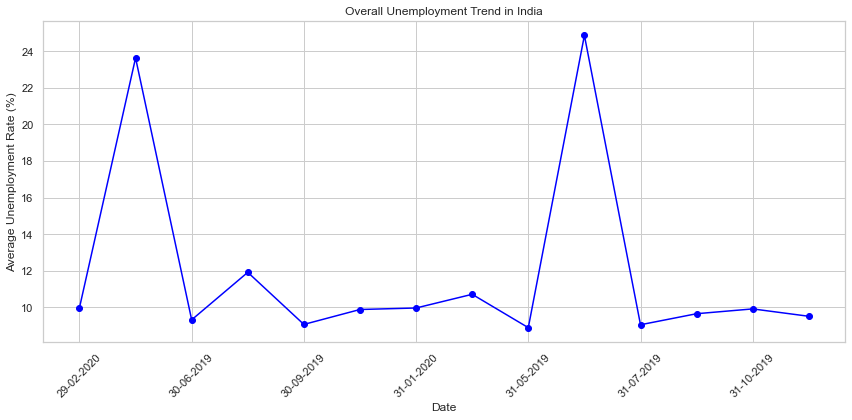

In [11]:
sns.set(style="whitegrid")

overall_trend = cleaned_unemployment_india.groupby('Date')[' Estimated Unemployment Rate (%)'].mean()

# Plotting the overall unemployment trend
plt.figure(figsize=(12, 6))
overall_trend.plot(color='blue', marker='o')
plt.title('Overall Unemployment Trend in India')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Unemployment Trend by Area (Rural vs Urban)

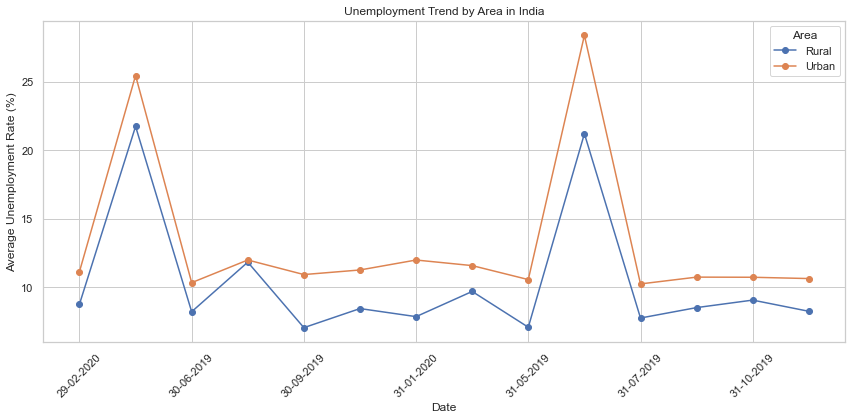

In [12]:
sns.set(style="whitegrid")
area_trend = cleaned_unemployment_india.groupby(['Date', 'Area'])[' Estimated Unemployment Rate (%)'].mean().unstack()

# Plotting the unemployment trend by area
plt.figure(figsize=(12, 6))
area_trend.plot(marker='o', ax=plt.gca())
plt.title('Unemployment Trend by Area in India')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.tight_layout()

plt.show()

### Unemployment Rate by Region

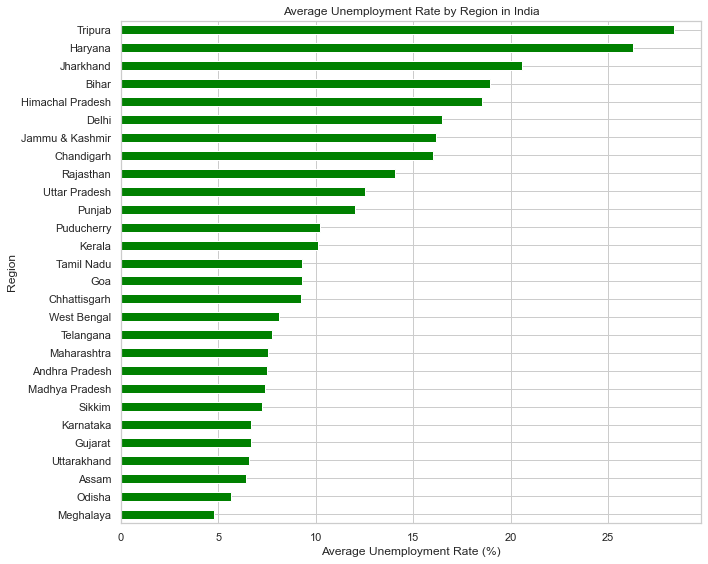

In [13]:
# Aggregating data by Region to see the average unemployment rate
region_unemployment = cleaned_unemployment_india.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()

# Plotting the average unemployment rate by region
plt.figure(figsize=(10, 8))
region_unemployment.plot(kind='barh', color='green')
plt.title('Average Unemployment Rate by Region in India')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()

plt.show()


<!-- # Re-loading the cleaned dataset due to code execution state reset
file_path = '/mnt/data/Unemployment_in_India.csv'
unemployment_india = pd.read_csv(file_path)
unemployment_india.columns = unemployment_india.columns.str.strip()
unemployment_india['Date'] = pd.to_datetime(unemployment_india['Date'].str.strip(), format='%d-%m-%Y')
cleaned_unemployment_india = unemployment_india.dropna().drop_duplicates()

# Breakdown by Region: Unemployment Rate
# Aggregating data by Region to see the average unemployment rate
region_unemployment = cleaned_unemployment_india.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Plotting the average unemployment rate by region
plt.figure(figsize=(10, 8))
region_unemployment.plot(kind='barh', color='green')
plt.title('Average Unemployment Rate by Region in India')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()

plt.show() -->


### Relationship with Labor Participation Rate

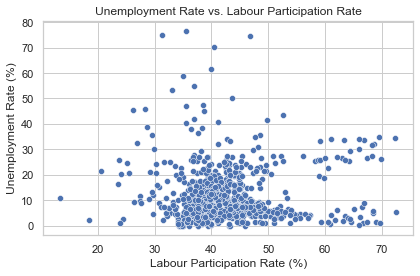

In [14]:
sns.scatterplot(data=cleaned_unemployment_india, x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()

plt.show()


### Comparative Analysis (Pre-COVID vs. Post-COVID)

In [17]:
# Convert 'Date' column to Timestamp
cleaned_unemployment_india['Date'] = pd.to_datetime(cleaned_unemployment_india['Date'])

# Filtering for pre-COVID and post-COVID
pre_covid = cleaned_unemployment_india[cleaned_unemployment_india['Date'] < pd.Timestamp('2020-03-01')]
post_covid = cleaned_unemployment_india[cleaned_unemployment_india['Date'] >= pd.Timestamp('2020-03-01')]

# Calculating average unemployment rates for both periods
avg_unemployment_pre_covid = pre_covid[' Estimated Unemployment Rate (%)'].mean()
avg_unemployment_post_covid = post_covid[' Estimated Unemployment Rate (%)'].mean()

# Displaying the average unemployment rates for pre-COVID and post-COVID
avg_unemployment_pre_covid, avg_unemployment_post_covid



(9.50953358208956, 17.77436274509804)

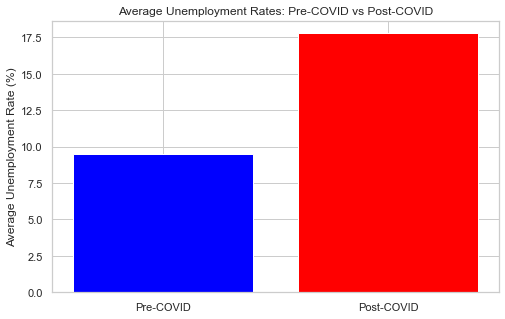

In [ ]:
# Data for plotting
categories = ['Pre-COVID', 'Post-COVID']
values = [avg_unemployment_pre_covid, avg_unemployment_post_covid]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'red'])
plt.title('Average Unemployment Rates: Pre-COVID vs Post-COVID')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()


<p>Average Unemployment Rate Pre-COVID: Approximately 9.51%</p>
<p>Average Unemployment Rate Post-COVID: Approximately 17.77%</p>

<p>This comparison indicates a significant increase in the average unemployment rate after the onset of the COVID-19 pandemic, nearly doubling the pre-pandemic levels.</p>